# 다익스트라(Dijkstra) 알고리즘

다익스트라 알고리즘을 구현해보자.
이전에 사용했던 Graph와 Vertex 클래스를 변경하여 사용해보자.

In [2]:
import math

class Vertex:
    def __init__(self, v):
        self.inNeighbors = [] # 진입 간선: (이웃 정점, 가중치) 의 형태로 저장되어있다.
        self.outNeighbors = [] # 진출 간선
        self.value = v

        self.prev = None # 경로가 어느 곳과 연결되어야 하는가?
        self.dist = math.inf # d 값

    def getOutNeighborsWithWeights(self):
        return self.outNeighbors

    def addOutNeighbor(self,v,wt):
        self.outNeighbors.append((v,wt))

    def addInNeighbor(self,v,wt):
        self.inNeighbors.append((v,wt))

    def __str__(self):
        return str(self.value)


class Graph:
    def __init__(self):
        self.vertices = []

    def addVertex(self,n):
        self.vertices.append(n)

    # Vertex u 에서 v 로 가는 유향 간선(directed edge) 추가
    def addDiEdge(self,u,v,wt=1):
        u.addOutNeighbor(v,wt=wt)
        v.addInNeighbor(u,wt=wt)

    # 유향 간선 리스트를 반환
    def getDirEdges(self):
        ret = []
        for v in self.vertices:
            for u, wt in v.getOutNeighborsWithWeights():
                ret.append( [v,u,wt] )
        return ret

    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b,wt in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + "; wt:" + str(wt) + ") "
        ret += "\n"
        return ret

## 랜덤 그래프 생성

이번 과제에서는 그래프를 랜덤하게 작성해봅니다.

In [1]:
from random import random
from random import choice

def randomGraph(n,p,wts=[1]):
    G = Graph()
    V = [ Vertex(x) for x in range(n) ]
    for v in V:
        G.addVertex(v)
    for v in V:
        for w in V:
            if v != w:
                if random() < p:
                    G.addDiEdge(v,w,wt=choice(wts))
    return G

## 그래프 렌더링

생성된 그래프를 그려봅시다.

In [3]:
from graphviz import Digraph as vizGraph

def renderGraph(g:Graph):
    vg = vizGraph('Graph',strict=True)

    # 정점 추가
    for v in g.vertices:
        vg.node(str(v), label=str(v)+ "("+str(v.dist)+")")

    # 간선 추가
    for v in g.vertices:
        for (u, wt) in v.outNeighbors:
            if u.prev == v:
                vg.edge(str(v), str(u), label=str(wt), color='red', penwidth='3')
            else:
                vg.edge(str(v), str(u), label=str(wt))

    vg.render('render', view=True)
    return vg


## 알고리즘

알고리즘을 구현하기 위해 우리는 V-S 집합에서 최소 dist를 가진 노드를 가져와야합니다.
이를 위해서 heapdict 라는 패키지를 사용할 것입니다.

사용법은 다음과 같습니다.

```python
#새로 선언
notS = heapdict.heapdict()

#값의 삽입
#정점 v에 distance 값(경로값) 할당
notS[v] = distance

#비었는지 체크
len(notS) != 0

#최소 distance 값과 해당하는 정점 u를 받아온다.
u, distance = notS.popitem()

#정점 u 의 distance 값 업데이트
#삽입과 동일합니다.
notS[u] = distance + weight
```

이를 참고하여 다익스트라 알고리즘을 작성해봅시다.

In [4]:
!pip install heapdict

import heapdict as heapdict

def dijkstra(G, w):
  S = []
  notS = heapdict.heapdict()
  for v in G.vertices:
    if v == w:
      v.dist = 0
    else:
      v.dist = math.inf
    notS[v] = v.dist

## 최소 비용 경로

최소 비용 경로를 찾는 코드입니다.

prev를 따라 경로를 재구성합니다.

In [5]:
def dijkstra_shortestPaths(G, w):
    dijkstra(G, w)
    # 각 정점마다 최단 경로를 출력해보자
    for v in G.vertices:
        if v.dist == math.inf:
            print("Cannot reach " + str(v))
            continue
        path = []
        current = v
        while current != w:
            path.append(current)
            current = current.prev
        path.append(current)
        path.reverse()
        print([ str(x) for x in path ])

## 테스트 코드

Graph with:
	 Vertices:
	0,1,2,3,4,
	 Edges:
	(0,1; wt:5) (0,3; wt:4) (0,4; wt:4) (2,3; wt:1) (2,4; wt:4) (3,4; wt:2) (4,0; wt:1) (4,2; wt:3) 

['0']
Cannot reach 1
Cannot reach 2
Cannot reach 3
Cannot reach 4


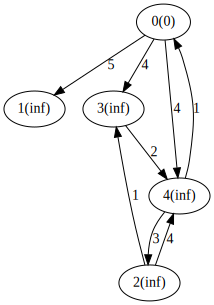

In [6]:
G = randomGraph(5,.4,[1,2,3,4,5])
print(G)
dijkstra_shortestPaths(G, G.vertices[0])
renderGraph(G)